# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

634

In [4]:
cities

['tahe',
 'tasiilaq',
 'mora',
 'bluff',
 'whitefish',
 'rikitea',
 'komsomolskiy',
 'yellowknife',
 'hami',
 'lompoc',
 'barrow',
 'vitim',
 'ushuaia',
 'razdolinsk',
 'east london',
 'vanderhoof',
 'astara',
 'mataura',
 'el tigre',
 'novyy urengoy',
 'antofagasta',
 'port elizabeth',
 'barentsburg',
 'fairbanks',
 'albany',
 'khatanga',
 'bundaberg',
 'katsuura',
 'kadykchan',
 'atuona',
 'la ronge',
 'cape town',
 'airai',
 'santa fe',
 'tiarei',
 'faanui',
 'port hedland',
 'amapa',
 'belushya guba',
 'severo-kurilsk',
 'taolanaro',
 'mys shmidta',
 'port alfred',
 'punta arenas',
 'arraial do cabo',
 'san patricio',
 'busselton',
 'bredasdorp',
 'evensk',
 'dikson',
 'marystown',
 'jamestown',
 'marsh harbour',
 'nouadhibou',
 'varkaus',
 'panguna',
 'gat',
 'palabuhanratu',
 'avarua',
 'pak phanang',
 'bolshoye murashkino',
 'new norfolk',
 'muchkapskiy',
 'chuy',
 'skotterud',
 'carnarvon',
 'victoria',
 'waipawa',
 'rivers',
 'price',
 'pevek',
 'arman',
 'chokurdakh',
 'acapu

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_weather_description = city_weather["weather"][0]["description"]       
            
            # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Current Description": city_weather_description,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
    # If an error is experienced, skip the city

    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tahe
Processing Record 2 of Set 1 | tasiilaq
Processing Record 3 of Set 1 | mora
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | whitefish
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | hami
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | barrow
Processing Record 12 of Set 1 | vitim
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | razdolinsk
Processing Record 15 of Set 1 | east london
Processing Record 16 of Set 1 | vanderhoof
Processing Record 17 of Set 1 | astara
Processing Record 18 of Set 1 | mataura
Processing Record 19 of Set 1 | el tigre
Processing Record 20 of Set 1 | novyy urengoy
Processing Record 21 of Set 1 | antofagasta
Processing Record 22 of Set 1 | port elizabeth
Processing Record 23 of Set 1 | barentsburg
C

Processing Record 37 of Set 4 | erenhot
Processing Record 38 of Set 4 | xiongshi
City not found. Skipping...
Processing Record 39 of Set 4 | nikolskoye
Processing Record 40 of Set 4 | zhuhai
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | russell
Processing Record 43 of Set 4 | ust-katav
Processing Record 44 of Set 4 | samusu
City not found. Skipping...
Processing Record 45 of Set 4 | upernavik
Processing Record 46 of Set 4 | olinda
Processing Record 47 of Set 4 | lingao
Processing Record 48 of Set 4 | verkhnevilyuysk
Processing Record 49 of Set 4 | nicolas bravo
Processing Record 50 of Set 4 | mujiayingzi
Processing Record 1 of Set 5 | luz
Processing Record 2 of Set 5 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | buraydah
Processing Record 5 of Set 5 | saldanha
Processing Record 6 of Set 5 | ayr
Processing Record 7 of Set 5 | mazara del vallo
Processing R

Processing Record 26 of Set 8 | kula
Processing Record 27 of Set 8 | holovyne
Processing Record 28 of Set 8 | palana
Processing Record 29 of Set 8 | port moresby
Processing Record 30 of Set 8 | berdigestyakh
Processing Record 31 of Set 8 | fort nelson
Processing Record 32 of Set 8 | cidreira
Processing Record 33 of Set 8 | talcahuano
Processing Record 34 of Set 8 | kurumkan
Processing Record 35 of Set 8 | smolenka
Processing Record 36 of Set 8 | tazmalt
Processing Record 37 of Set 8 | nieuw amsterdam
Processing Record 38 of Set 8 | anadyr
Processing Record 39 of Set 8 | bukachacha
Processing Record 40 of Set 8 | brae
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | ballina
Processing Record 43 of Set 8 | yanan
City not found. Skipping...
Processing Record 44 of Set 8 | geilo
Processing Record 45 of Set 8 | channel-port aux basques
Processing Record 46 of Set 8 | la primavera
Processing Record 47 of Set 8 | alofi
Processing Record 48 of Set 8 | bolungarvik
City no

Processing Record 13 of Set 12 | yanam
Processing Record 14 of Set 12 | guerrero negro
Processing Record 15 of Set 12 | lyaskelya
Processing Record 16 of Set 12 | ajdovscina
Processing Record 17 of Set 12 | mount gambier
Processing Record 18 of Set 12 | chokwe
Processing Record 19 of Set 12 | duzici
City not found. Skipping...
Processing Record 20 of Set 12 | portland
Processing Record 21 of Set 12 | sorong
Processing Record 22 of Set 12 | rocha
Processing Record 23 of Set 12 | yeniseysk
Processing Record 24 of Set 12 | tirau
Processing Record 25 of Set 12 | mount isa
Processing Record 26 of Set 12 | beringovskiy
Processing Record 27 of Set 12 | yerofey pavlovich
Processing Record 28 of Set 12 | arona
Processing Record 29 of Set 12 | nemuro
Processing Record 30 of Set 12 | ketchikan
Processing Record 31 of Set 12 | north bend
Processing Record 32 of Set 12 | tairua
Processing Record 33 of Set 12 | mubi
Processing Record 34 of Set 12 | pangnirtung
Processing Record 35 of Set 12 | grand 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv('citydata.csv',encoding='utf-8')

In [32]:
city_data_df

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Tahe,52.3333,124.7333,-4.05,overcast clouds,100,99,2.21,CN
1,Tasiilaq,65.6145,-37.6368,14.16,broken clouds,65,51,10.31,GL
2,Mora,11.0461,14.1401,75.96,scattered clouds,10,33,8.52,CM
3,Bluff,-46.6000,168.3333,59.81,overcast clouds,97,98,5.50,NZ
4,Whitefish,48.4111,-114.3376,38.05,overcast clouds,79,100,3.44,US
...,...,...,...,...,...,...,...,...,...
574,Natal,-5.7950,-35.2094,88.45,few clouds,62,20,16.11,BR
575,Matane,48.8286,-67.5220,29.62,overcast clouds,87,100,8.52,CA
576,Dolores,-36.3132,-57.6792,84.04,scattered clouds,27,27,8.97,AR
577,Trincomalee,8.5711,81.2335,79.36,overcast clouds,75,86,11.27,LK


In [33]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,20.945462,20.886385,51.132539,71.975820,55.507772,8.100984
std,33.563209,91.232052,32.498376,22.674455,39.641881,5.771206
min,-54.800000,-175.200000,-44.320000,6.000000,0.000000,0.000000
25%,-7.897350,-58.893450,32.075000,62.000000,14.000000,3.950000
50%,25.083300,27.430600,63.000000,76.000000,62.000000,6.910000
75%,50.075100,101.024100,76.785000,89.500000,99.000000,10.845000
max,78.218600,179.316700,97.680000,100.000000,100.000000,33.240000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [41]:
### Skipping because as seen above the max humidty is 100%.

In [40]:
#  Get the indices of cities that have humidity over 100%.
### Skipping because max humidity of cities is 100%

In [38]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
from scipy import stats
no_outliers = city_data_df[(np.abs(stats.zscore(city_data_df["Humidity"])) < 3)]
no_outliers

,City,Lat,Lng,Max Temp,Current Description,Humidity,Cloudiness,Wind Speed,Country
0,Tahe,52.3333,124.7333,-4.05,overcast clouds,100,99,2.21,CN
1,Tasiilaq,65.6145,-37.6368,14.16,broken clouds,65,51,10.31,GL
2,Mora,11.0461,14.1401,75.96,scattered clouds,10,33,8.52,CM
3,Bluff,-46.6000,168.3333,59.81,overcast clouds,97,98,5.50,NZ
4,Whitefish,48.4111,-114.3376,38.05,overcast clouds,79,100,3.44,US
...,...,...,...,...,...,...,...,...,...
574,Natal,-5.7950,-35.2094,88.45,few clouds,62,20,16.11,BR
575,Matane,48.8286,-67.5220,29.62,overcast clouds,87,100,8.52,CA
576,Dolores,-36.3132,-57.6792,84.04,scattered clouds,27,27,8.97,AR
577,Trincomalee,8.5711,81.2335,79.36,overcast clouds,75,86,11.27,LK


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

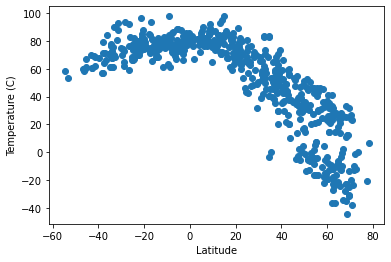

In [43]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

## Latitude vs. Humidity Plot

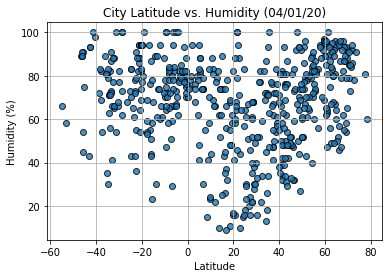

In [11]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

## Latitude vs. Cloudiness Plot

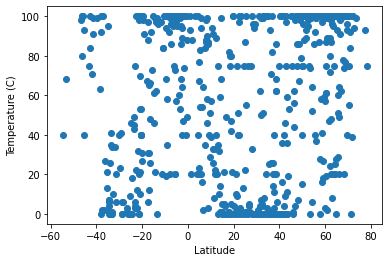

In [48]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

## Latitude vs. Wind Speed Plot

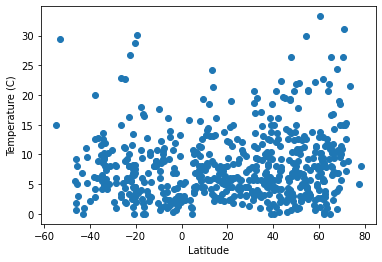

In [49]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.46937863826630627


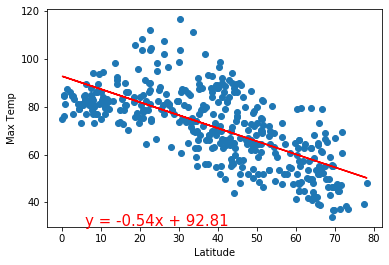

In [25]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('temp)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.25208289202218404


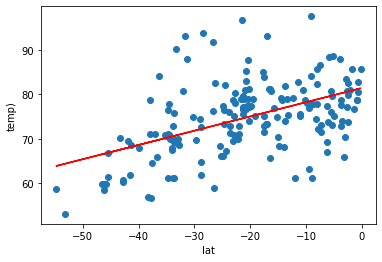

In [47]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('temp)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19666486584949375


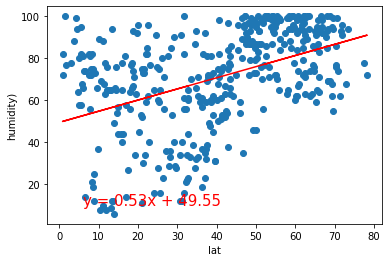

In [50]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('humidity)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.026916774115082684


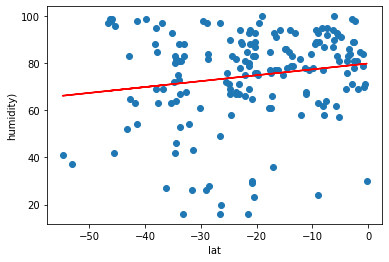

In [51]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('humidity)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.10996120241687626


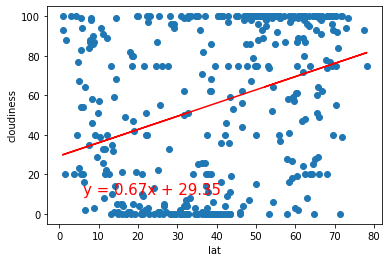

In [54]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09859096975852742


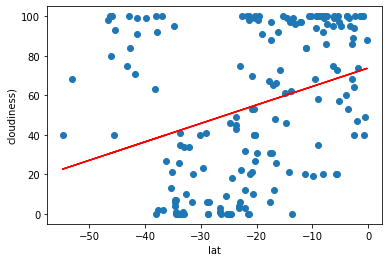

In [52]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('cloudiness)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.024137394660251263


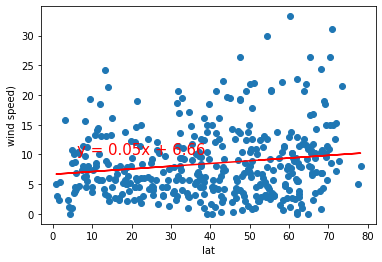

In [55]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('wind speed)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.023196353819930546


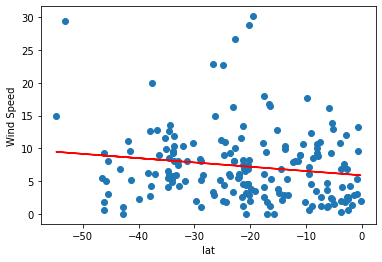

In [56]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lat')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()